In [2]:
import pandas as pd

# Load Fear & Greed Index file
fear_greed = pd.read_csv('/kaggle/input/mydataset/fear_greed_index.csv')

# Assuming historical trader data is in a CSV named 'historical_data.csv'
trader_data = pd.read_csv('/kaggle/input/mydataset/historical_data.csv')

# Display first few rows
print(fear_greed.head())
print(trader_data.head())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [3]:
# Convert Fear Greed Date
fear_greed['Date'] = pd.to_datetime(fear_greed['date']).dt.date

# Convert Trader Timestamp IST with correct format
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Extract only the date
trader_data['Date'] = trader_data['Timestamp IST'].dt.date

# Merge on Date
merged = pd.merge(trader_data, fear_greed, left_on='Date', right_on='Date', how='inner')

print(merged.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID  \
0         0.0  ...  5201

In [4]:
print(merged.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date', 'timestamp', 'value', 'classification', 'date'],
      dtype='object')


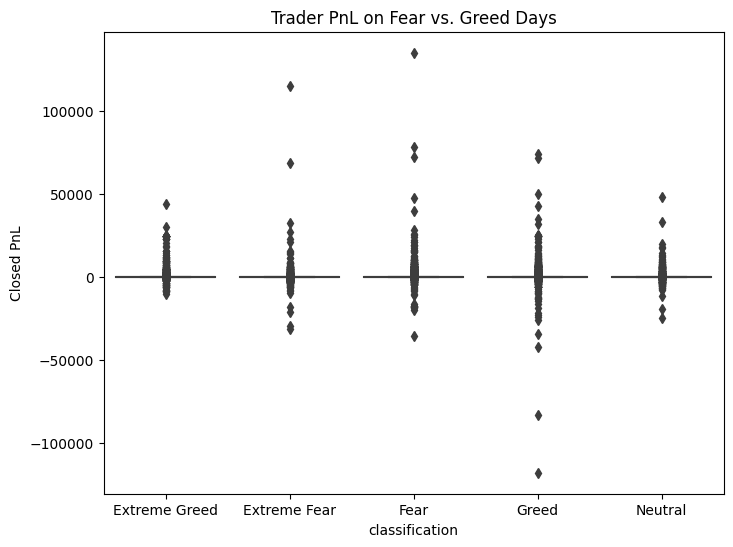

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='classification', y='Closed PnL', data=merged)
plt.title('Trader PnL on Fear vs. Greed Days')
plt.show()


  classification    Closed PnL
0   Extreme Fear  7.391102e+05
1  Extreme Greed  2.715171e+06
2           Fear  3.357155e+06
3          Greed  2.150129e+06
4        Neutral  1.292921e+06


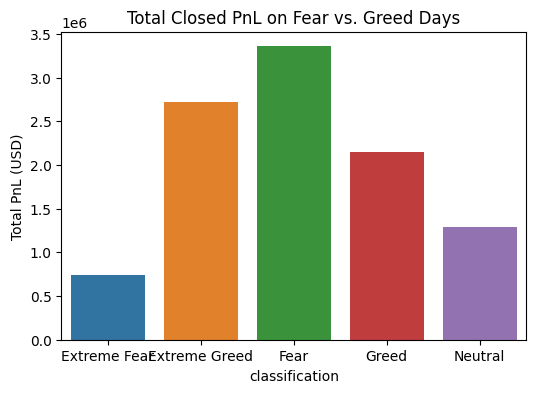

In [6]:
pnl_summary = merged.groupby('classification')['Closed PnL'].sum().reset_index()

print(pnl_summary)

# Bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='Closed PnL', data=pnl_summary)
plt.title('Total Closed PnL on Fear vs. Greed Days')
plt.ylabel('Total PnL (USD)')
plt.show()


  classification  profitable
0   Extreme Fear   37.060748
1  Extreme Greed   46.494299
2           Fear   42.076750
3          Greed   38.482794
4        Neutral   39.699093


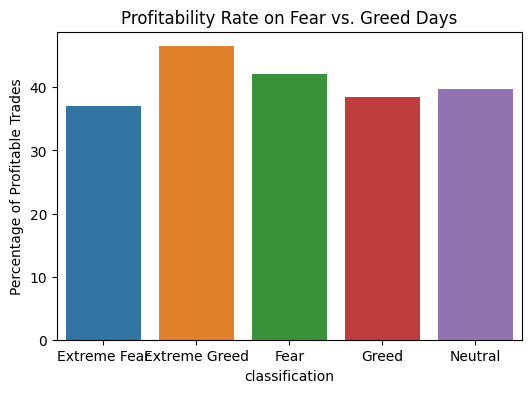

In [7]:
# Create profitability flag
merged['profitable'] = merged['Closed PnL'] > 0

# Calculate % of profitable trades under each sentiment
profitability = merged.groupby('classification')['profitable'].mean().reset_index()
profitability['profitable'] = profitability['profitable'] * 100  # Convert to percentage

print(profitability)

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='profitable', data=profitability)
plt.title('Profitability Rate on Fear vs. Greed Days')
plt.ylabel('Percentage of Profitable Trades')
plt.show()


  classification     Size USD
0   Extreme Fear  5349.731843
1  Extreme Greed  3112.251565
2           Fear  7816.109931
3          Greed  5736.884375
4        Neutral  4782.732661


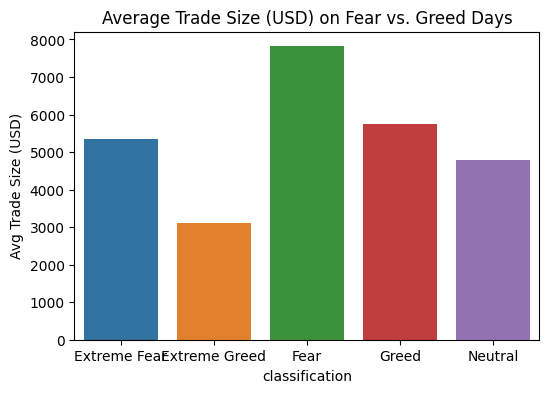

In [8]:
avg_size = merged.groupby('classification')['Size USD'].mean().reset_index()

print(avg_size)

plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='Size USD', data=avg_size)
plt.title('Average Trade Size (USD) on Fear vs. Greed Days')
plt.ylabel('Avg Trade Size (USD)')
plt.show()


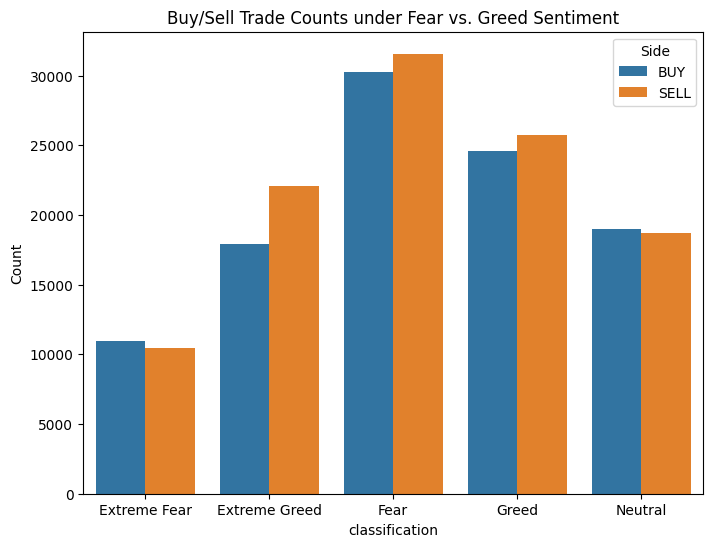

In [9]:
side_counts = merged.groupby(['classification', 'Side']).size().reset_index(name='Count')

plt.figure(figsize=(8,6))
sns.barplot(x='classification', y='Count', hue='Side', data=side_counts)
plt.title('Buy/Sell Trade Counts under Fear vs. Greed Sentiment')
plt.show()


In [10]:
summary = merged.groupby('classification')['Closed PnL'].agg(['sum', 'mean', 'count']).reset_index()
print(summary)


  classification           sum       mean  count
0   Extreme Fear  7.391102e+05  34.537862  21400
1  Extreme Greed  2.715171e+06  67.892861  39992
2           Fear  3.357155e+06  54.290400  61837
3          Greed  2.150129e+06  42.743559  50303
4        Neutral  1.292921e+06  34.307718  37686


In [11]:
# Group by sentiment and calculate:
# - Total Profit/Loss
# - Average Profit/Loss per trade
# - Number of trades (volume)

summary = merged.groupby('classification').agg({
    'Closed PnL': ['sum', 'mean'],
    'Account': 'count'  # Assuming one row per trade, counting Account gives trade count
}).reset_index()

# Rename columns for clarity
summary.columns = ['Sentiment', 'Total PnL', 'Average PnL per Trade', 'Trade Count']

print(summary)


       Sentiment     Total PnL  Average PnL per Trade  Trade Count
0   Extreme Fear  7.391102e+05              34.537862        21400
1  Extreme Greed  2.715171e+06              67.892861        39992
2           Fear  3.357155e+06              54.290400        61837
3          Greed  2.150129e+06              42.743559        50303
4        Neutral  1.292921e+06              34.307718        37686


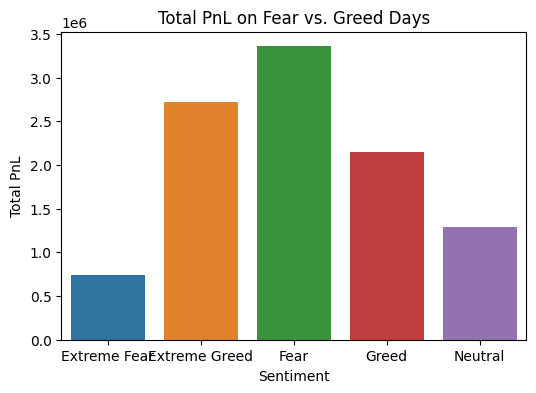

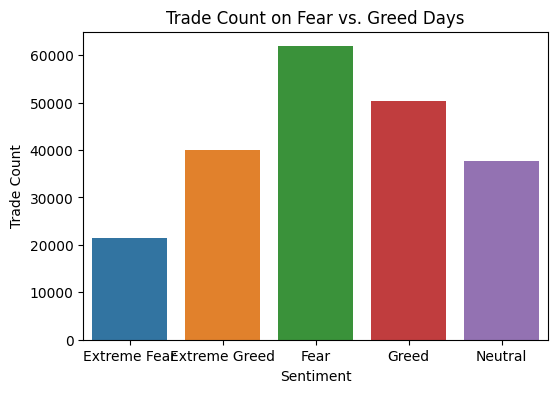

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total PnL
plt.figure(figsize=(6,4))
sns.barplot(x='Sentiment', y='Total PnL', data=summary)
plt.title('Total PnL on Fear vs. Greed Days')
plt.show()

# Trade Count
plt.figure(figsize=(6,4))
sns.barplot(x='Sentiment', y='Trade Count', data=summary)
plt.title('Trade Count on Fear vs. Greed Days')
plt.show()


       Sentiment     Total PnL  Average PnL per Trade  Trade Count
0   Extreme Fear  7.391102e+05              34.537862        21400
1  Extreme Greed  2.715171e+06              67.892861        39992
2           Fear  3.357155e+06              54.290400        61837
3          Greed  2.150129e+06              42.743559        50303
4        Neutral  1.292921e+06              34.307718        37686


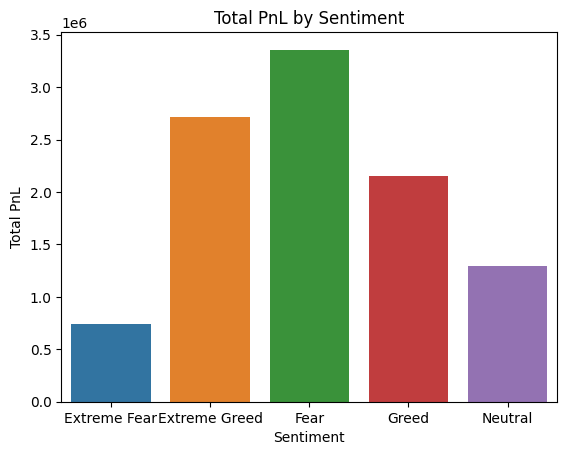

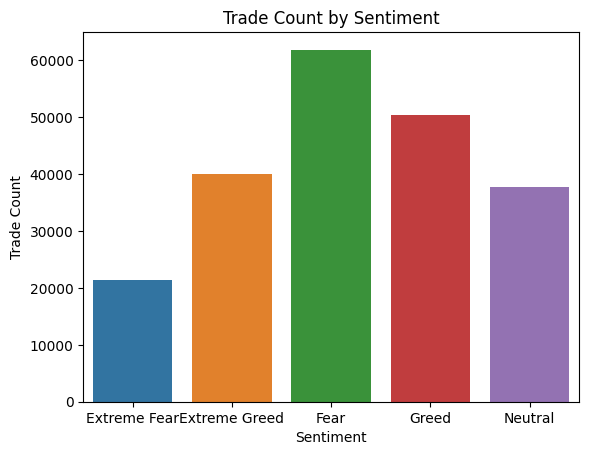

T-statistic: 1.85, P-value: 0.0642
              precision    recall  f1-score   support

       False       0.79      0.78      0.78     37196
        True       0.69      0.70      0.70     26170

    accuracy                           0.75     63366
   macro avg       0.74      0.74      0.74     63366
weighted avg       0.75      0.75      0.75     63366

MAE: 87.87
R2 Score: -0.20


['pnl_regressor.pkl']

In [13]:
# Market Sentiment & Trader Performance Analysis (Updated)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import joblib

# Load datasets
fear_greed = pd.read_csv('/kaggle/input/mydataset/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/mydataset/historical_data.csv')

# Preprocessing
fear_greed['Date'] = pd.to_datetime(fear_greed['date']).dt.date
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_data['Date'] = trader_data['Timestamp IST'].dt.date

# Merge datasets
merged = pd.merge(trader_data, fear_greed, on='Date', how='inner')

# Feature Engineering
merged['sentiment_encoded'] = merged['classification'].map({'Fear': 0, 'Greed': 1})
merged['profitable'] = merged['Closed PnL'] > 0
merged['side_encoded'] = merged['Side'].map({'BUY': 1, 'SELL': 0})
merged['direction_encoded'] = merged['Direction'].map({'Buy': 1, 'Sell': 0})
merged['fee_pct'] = merged['Fee'] / merged['Size USD']
merged['crossed_encoded'] = merged['Crossed'].astype(int)

# EDA
summary = merged.groupby('classification').agg({
    'Closed PnL': ['sum', 'mean'],
    'Account': 'count'
}).reset_index()
summary.columns = ['Sentiment', 'Total PnL', 'Average PnL per Trade', 'Trade Count']
print(summary)

# Visualization
sns.barplot(x='Sentiment', y='Total PnL', data=summary)
plt.title('Total PnL by Sentiment')
plt.show()

sns.barplot(x='Sentiment', y='Trade Count', data=summary)
plt.title('Trade Count by Sentiment')
plt.show()

# Statistical Test
fear_pnl = merged[merged['classification'] == 'Fear']['Closed PnL']
greed_pnl = merged[merged['classification'] == 'Greed']['Closed PnL']
t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

# ML: Profitability Classification
features = merged[['sentiment_encoded', 'Size USD', 'side_encoded', 'direction_encoded', 'fee_pct', 'crossed_encoded']]
target = merged['profitable']

imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.3, random_state=42)
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

joblib.dump(clf, 'profitability_classifier.pkl')

# ML: PnL Regression
features_reg = merged[['sentiment_encoded', 'Size USD', 'side_encoded', 'direction_encoded', 'fee_pct', 'crossed_encoded']]
target_reg = merged['Closed PnL']

features_reg_imputed = imputer.fit_transform(features_reg)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features_reg_imputed, target_reg, test_size=0.3, random_state=42)
reg = RandomForestRegressor()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_reg):.2f}")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg):.2f}")

joblib.dump(reg, 'pnl_regressor.pkl')


1. Understands trader performance under Fear & Greed sentiment
2. Statistically validates differences in performance
3. Builds a model to predict if a trade will be profitable
4. Builds a model to estimate potential trade PnL

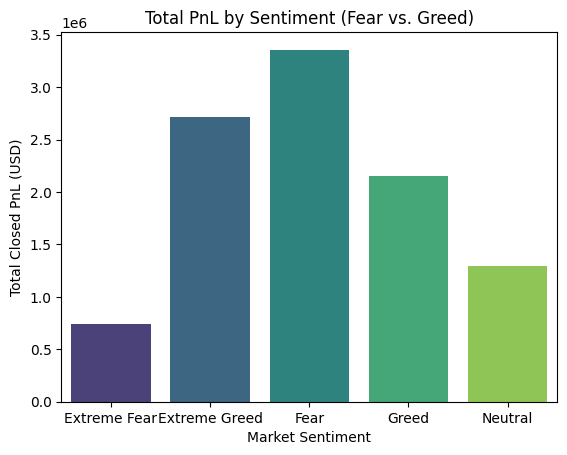

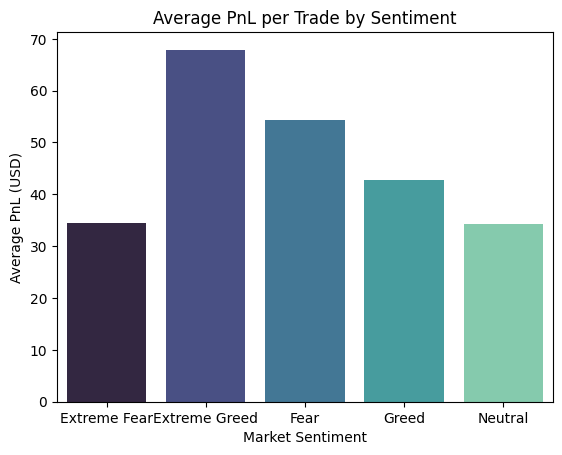

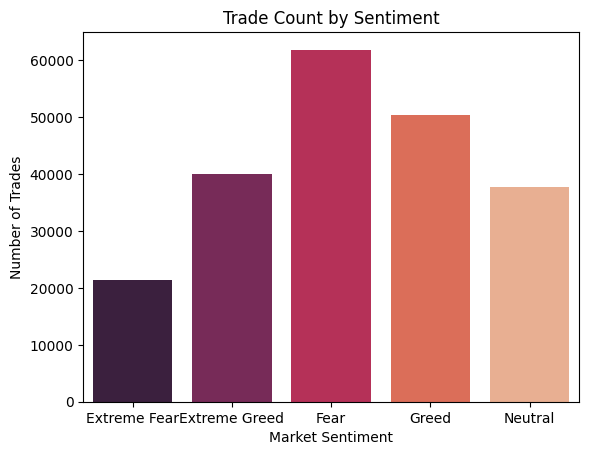

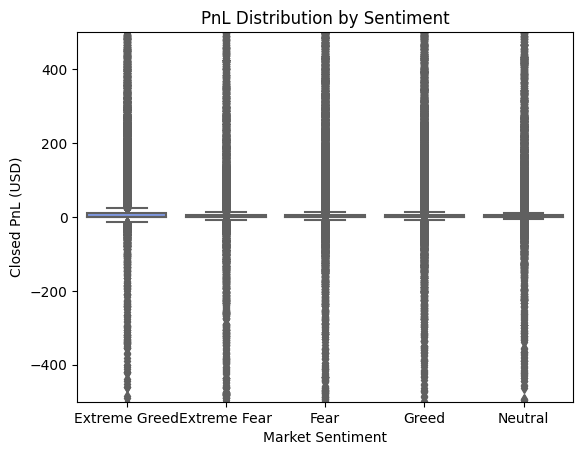

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


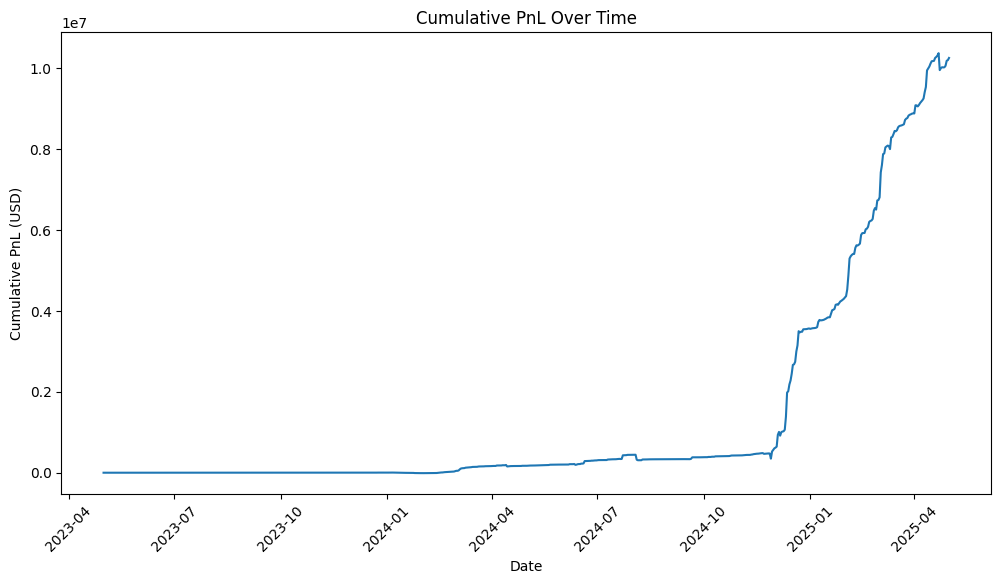

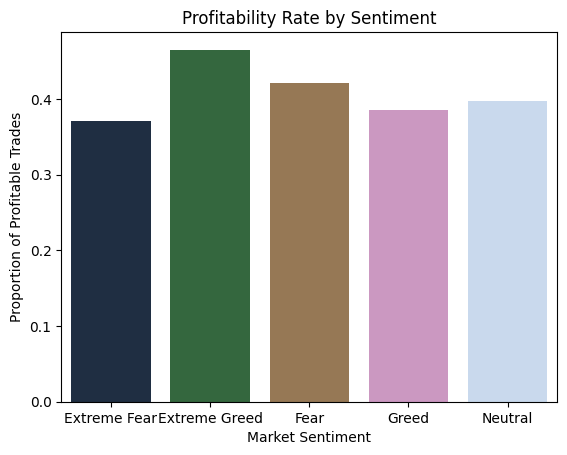

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary Aggregation
summary = merged.groupby('classification').agg({
    'Closed PnL': ['sum', 'mean'],
    'Account': 'count'
}).reset_index()

summary.columns = ['Sentiment', 'Total PnL', 'Average PnL per Trade', 'Trade Count']

# 1. Total PnL by Sentiment
sns.barplot(x='Sentiment', y='Total PnL', data=summary, palette='viridis')
plt.title('Total PnL by Sentiment (Fear vs. Greed)')
plt.ylabel('Total Closed PnL (USD)')
plt.xlabel('Market Sentiment')
plt.show()

# 2. Average PnL per Trade by Sentiment
sns.barplot(x='Sentiment', y='Average PnL per Trade', data=summary, palette='mako')
plt.title('Average PnL per Trade by Sentiment')
plt.ylabel('Average PnL (USD)')
plt.xlabel('Market Sentiment')
plt.show()

# 3. Trade Count by Sentiment
sns.barplot(x='Sentiment', y='Trade Count', data=summary, palette='rocket')
plt.title('Trade Count by Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.show()

# 4. PnL Distribution by Sentiment (Boxplot)
sns.boxplot(x='classification', y='Closed PnL', data=merged, palette='coolwarm')
plt.title('PnL Distribution by Sentiment')
plt.ylabel('Closed PnL (USD)')
plt.xlabel('Market Sentiment')
plt.ylim(-500, 500)  # Adjust based on your data
plt.show()

# 5. Cumulative PnL Over Time
cumulative_df = merged.groupby('Date').agg({'Closed PnL': 'sum'}).sort_index()
cumulative_df['Cumulative PnL'] = cumulative_df['Closed PnL'].cumsum()

plt.figure(figsize=(12,6))
sns.lineplot(data=cumulative_df, x=cumulative_df.index, y='Cumulative PnL')
plt.title('Cumulative PnL Over Time')
plt.ylabel('Cumulative PnL (USD)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

# 6. Profitability Rate by Sentiment
merged['profitable'] = merged['Closed PnL'] > 0
profit_rate = merged.groupby('classification')['profitable'].mean().reset_index()

sns.barplot(x='classification', y='profitable', data=profit_rate, palette='cubehelix')
plt.title('Profitability Rate by Sentiment')
plt.ylabel('Proportion of Profitable Trades')
plt.xlabel('Market Sentiment')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


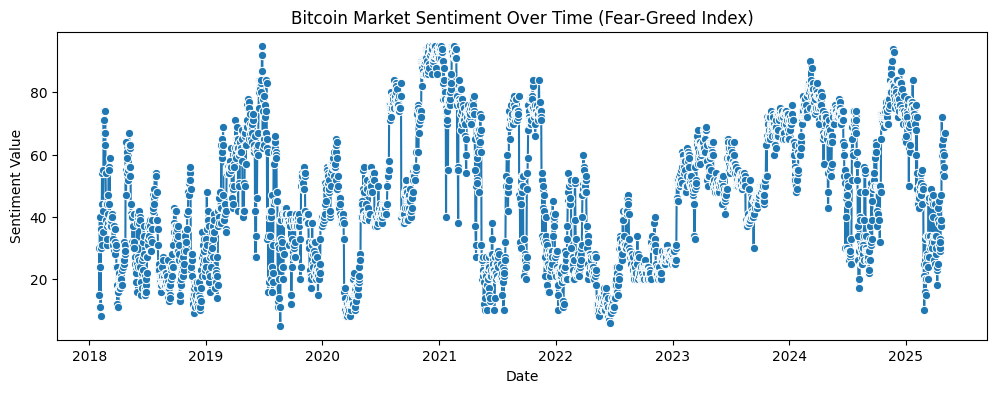

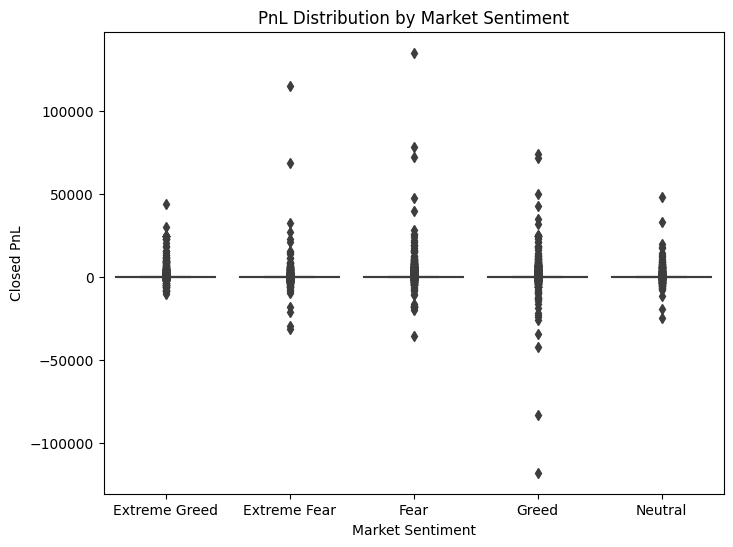

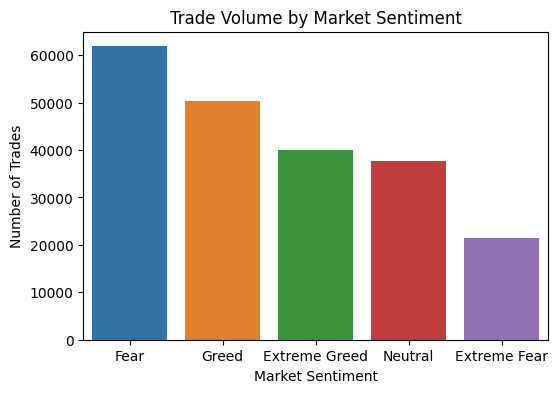

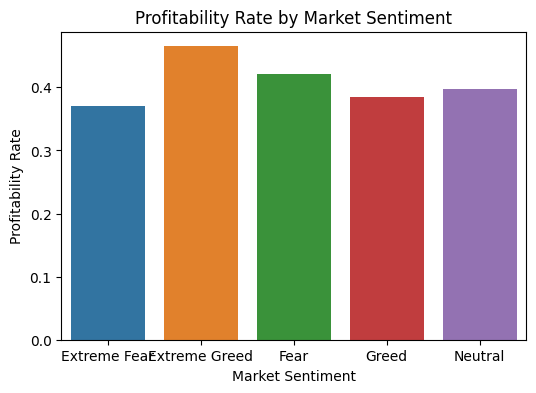

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


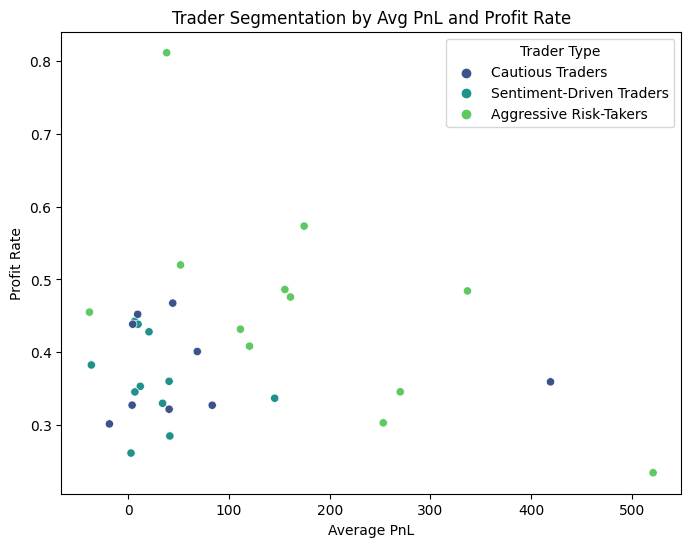

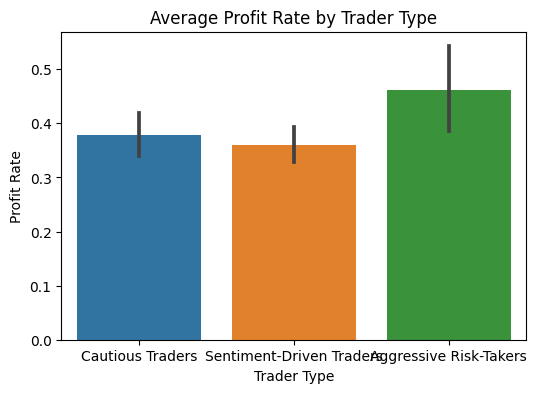

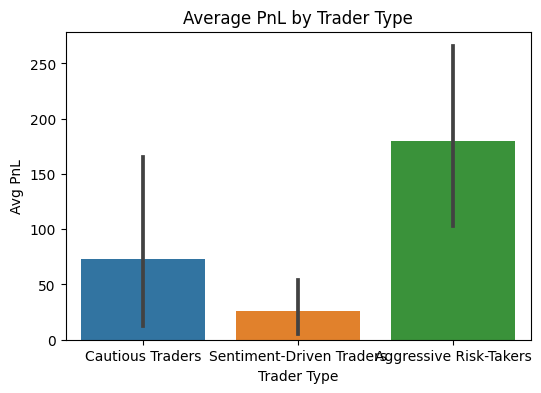

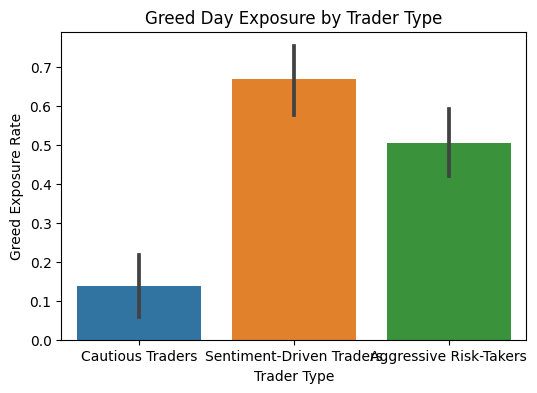

                          avg_trade_size_usd     avg_pnl   trade_count  \
cluster_label                                                            
Aggressive Risk-Takers           3556.407511  179.700462   2102.000000   
Cautious Traders                12209.546809   72.907061   6024.000000   
Sentiment-Driven Traders         3603.422830   25.886730  11979.818182   

                          profit_rate  greed_exposure  cluster  
cluster_label                                                   
Aggressive Risk-Takers       0.460842        0.503797      1.0  
Cautious Traders             0.377602        0.136441      0.0  
Sentiment-Driven Traders     0.360596        0.667466      2.0  


In [15]:
# Full Visualization Script for Trader Performance & Market Sentiment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ------------------ Sentiment Timeline ------------------
plt.figure(figsize=(12, 4))
sns.lineplot(data=fear_greed, x='Date', y='value', marker='o')
plt.title('Bitcoin Market Sentiment Over Time (Fear-Greed Index)')
plt.ylabel('Sentiment Value')
plt.xlabel('Date')
plt.show()

# ------------------ PnL Distribution by Sentiment ------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged, x='classification', y='Closed PnL')
plt.title('PnL Distribution by Market Sentiment')
plt.ylabel('Closed PnL')
plt.xlabel('Market Sentiment')
plt.show()

# ------------------ Trade Count by Sentiment ------------------
trade_counts = merged['classification'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=trade_counts.index, y=trade_counts.values)
plt.title('Trade Volume by Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.show()

# ------------------ Profitability Rate by Sentiment ------------------
profit_rate = merged.groupby('classification')['profitable'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=profit_rate, x='classification', y='profitable')
plt.title('Profitability Rate by Market Sentiment')
plt.ylabel('Profitability Rate')
plt.xlabel('Market Sentiment')
plt.show()

# ------------------ Trader Segmentation with K-Means ------------------
trader_summary = merged.groupby('Account').agg({
    'Size USD': 'mean',
    'Closed PnL': 'mean',
    'Trade ID': 'count',
    'profitable': 'mean',
    'sentiment_encoded': 'mean'
}).reset_index()

trader_summary.rename(columns={
    'Size USD': 'avg_trade_size_usd',
    'Closed PnL': 'avg_pnl',
    'Trade ID': 'trade_count',
    'profitable': 'profit_rate',
    'sentiment_encoded': 'greed_exposure'
}, inplace=True)

trader_summary.fillna(0, inplace=True)
features = trader_summary[['avg_trade_size_usd', 'avg_pnl', 'trade_count', 'profit_rate', 'greed_exposure']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
trader_summary['cluster'] = kmeans.fit_predict(scaled_features)

cluster_mapping = {
    0: 'Cautious Traders',
    1: 'Aggressive Risk-Takers',
    2: 'Sentiment-Driven Traders'
}
trader_summary['cluster_label'] = trader_summary['cluster'].map(cluster_mapping)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=trader_summary, x='avg_pnl', y='profit_rate', hue='cluster_label', palette='viridis')
plt.title('Trader Segmentation by Avg PnL and Profit Rate')
plt.xlabel('Average PnL')
plt.ylabel('Profit Rate')
plt.legend(title='Trader Type')
plt.show()

# ------------------ Additional Cluster Visualizations ------------------
# Profit Rate by Trader Type
plt.figure(figsize=(6, 4))
sns.barplot(data=trader_summary, x='cluster_label', y='profit_rate')
plt.title('Average Profit Rate by Trader Type')
plt.ylabel('Profit Rate')
plt.xlabel('Trader Type')
plt.show()

# Average PnL by Trader Type
plt.figure(figsize=(6, 4))
sns.barplot(data=trader_summary, x='cluster_label', y='avg_pnl')
plt.title('Average PnL by Trader Type')
plt.ylabel('Avg PnL')
plt.xlabel('Trader Type')
plt.show()

# Greed Exposure by Trader Type
plt.figure(figsize=(6, 4))
sns.barplot(data=trader_summary, x='cluster_label', y='greed_exposure')
plt.title('Greed Day Exposure by Trader Type')
plt.ylabel('Greed Exposure Rate')
plt.xlabel('Trader Type')
plt.show()

# Summary stats by cluster
print(trader_summary.groupby('cluster_label').mean(numeric_only=True))

In [16]:
pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=35add7e44f9847d607b92ba209e5c0bfdbd8ca97239586676e20002c8c09e5e4
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma
Note: you may need to restart the kernel to use updated packages.


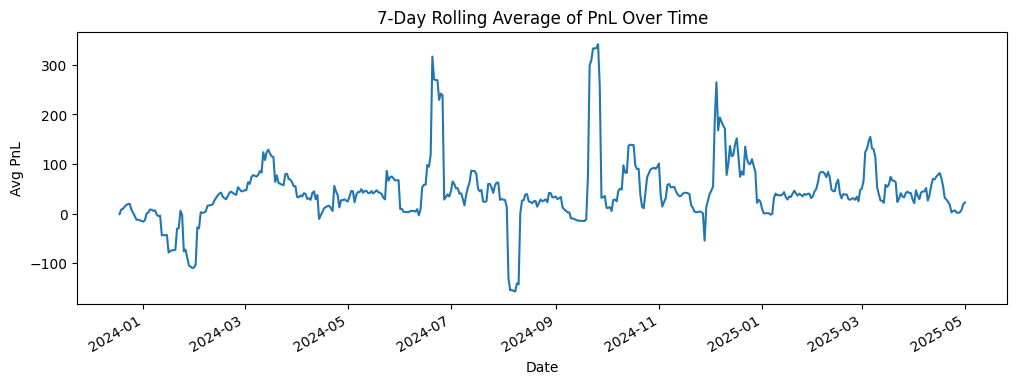

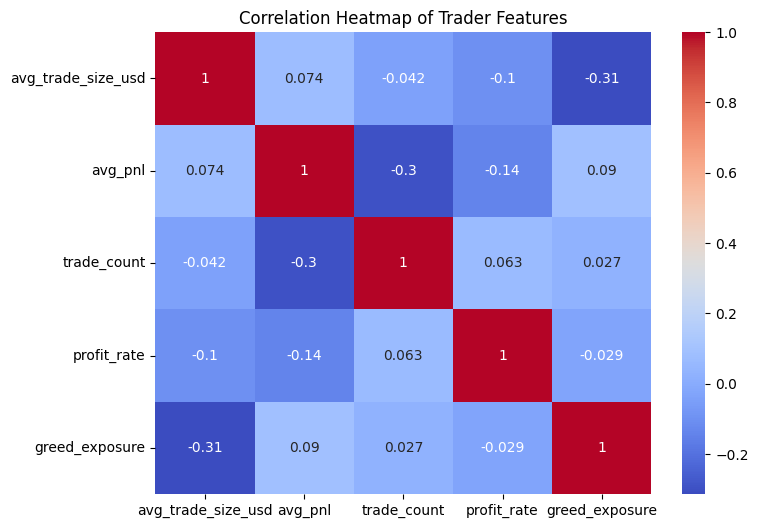

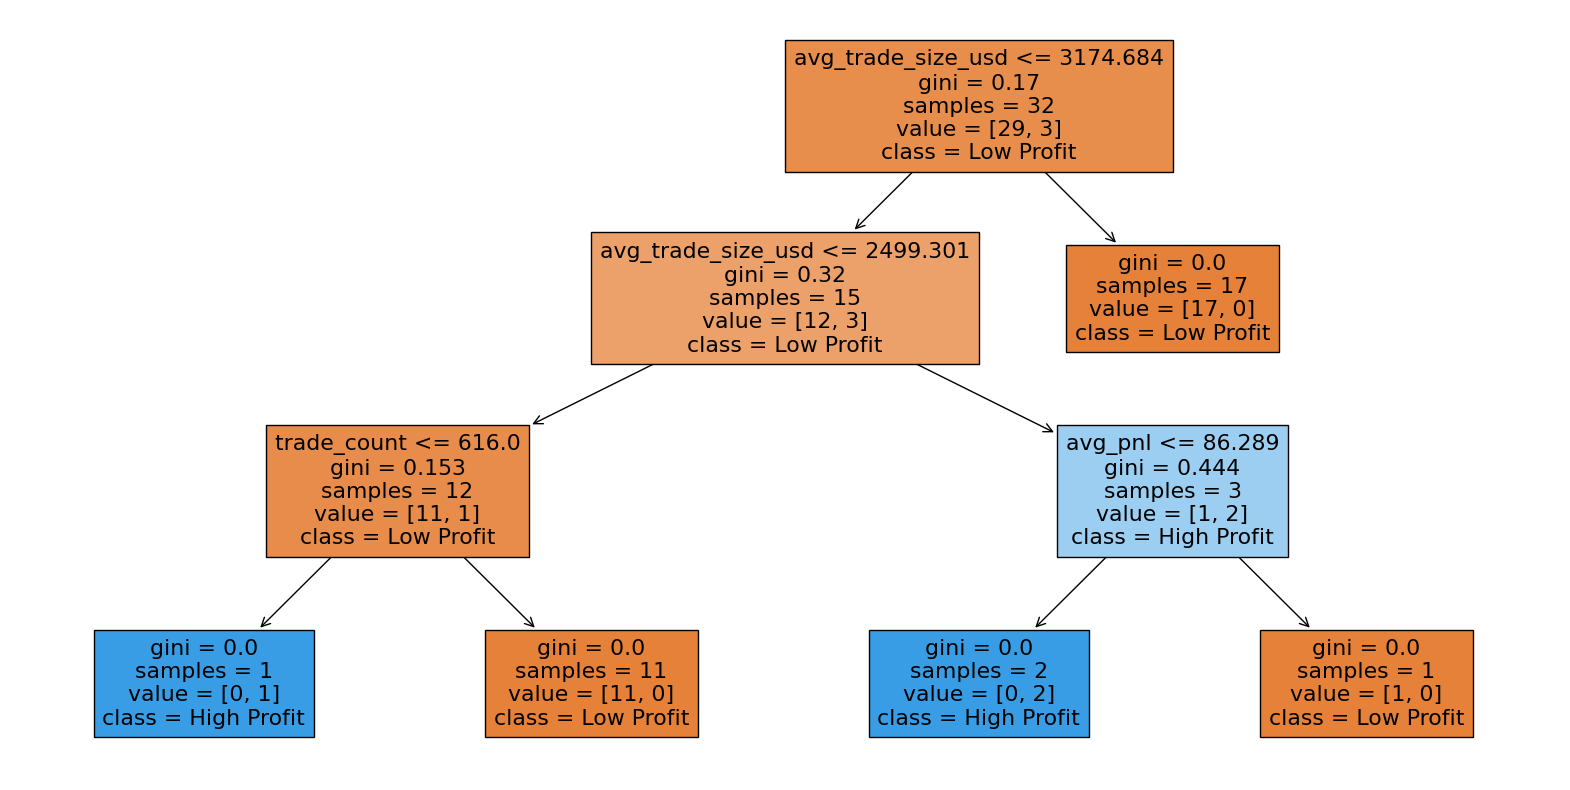

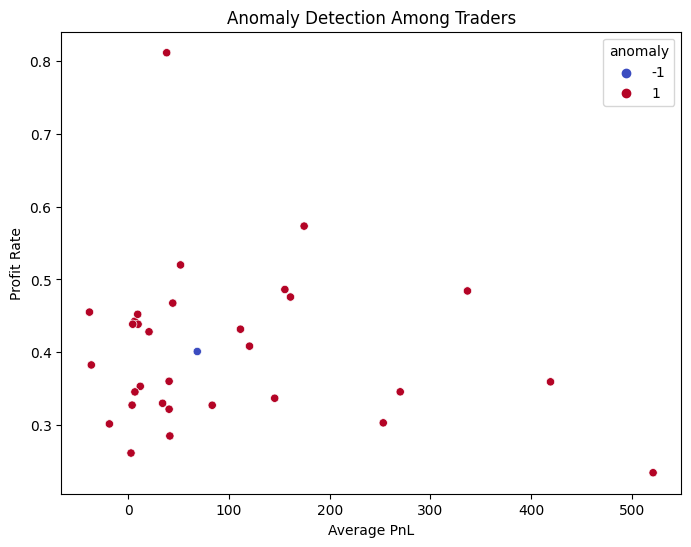

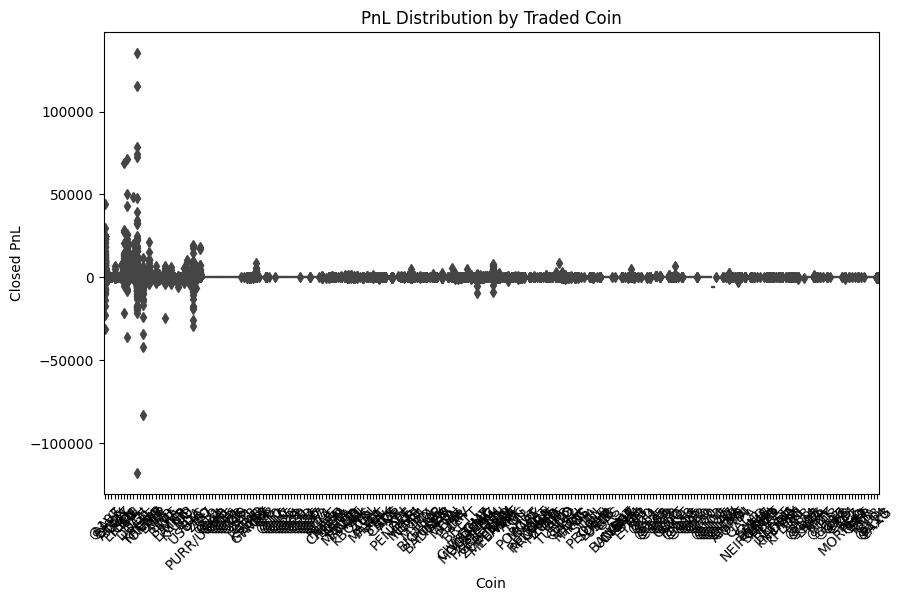

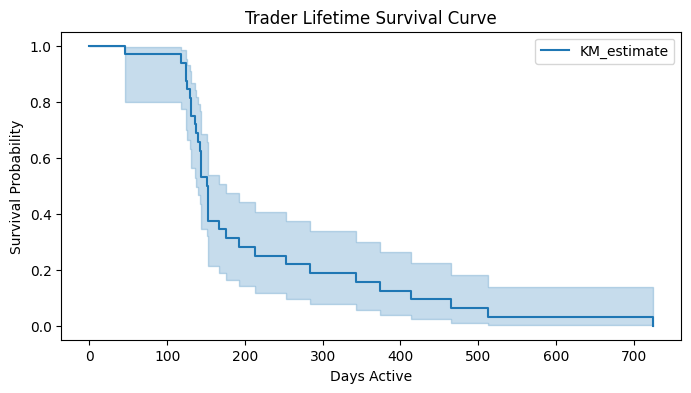

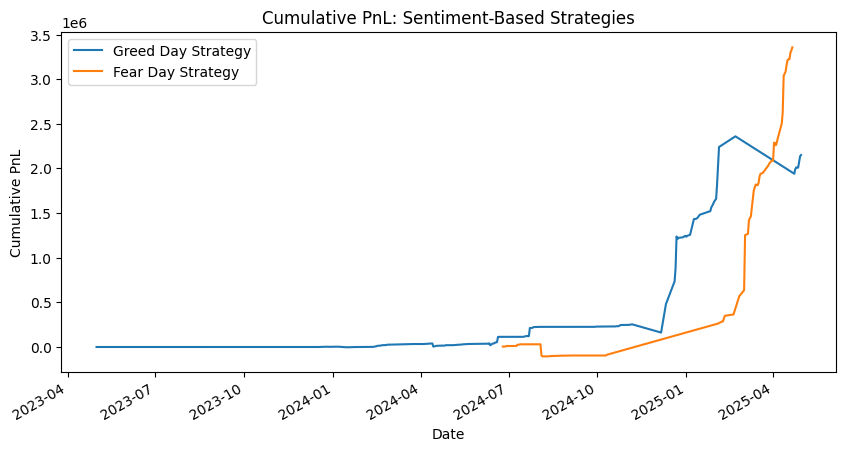

In [17]:
# Advanced Non-Repetitive Trader Sentiment Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from lifelines import KaplanMeierFitter

# Assuming merged and trader_summary DataFrames already prepared

# ------------------ 1. Time-Series Profitability Analysis ------------------
merged['Date'] = pd.to_datetime(merged['Date'])
daily_pnl = merged.groupby('Date')['Closed PnL'].mean().rolling(7).mean()

plt.figure(figsize=(12, 4))
daily_pnl.plot()
plt.title('7-Day Rolling Average of PnL Over Time')
plt.ylabel('Avg PnL')
plt.xlabel('Date')
plt.show()

# ------------------ 2. Correlation Heatmap of Trader Features ------------------
plt.figure(figsize=(8, 6))
sns.heatmap(trader_summary[['avg_trade_size_usd', 'avg_pnl', 'trade_count', 'profit_rate', 'greed_exposure']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Trader Features')
plt.show()

# ------------------ 3. Decision Tree for Interpretability ------------------
features = trader_summary[['avg_trade_size_usd', 'avg_pnl', 'trade_count', 'greed_exposure']]
target = trader_summary['profit_rate'] > 0.5  # Binary target: High Profit vs Low Profit

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(features, target)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features.columns, class_names=['Low Profit', 'High Profit'], filled=True)
plt.show()

# ------------------ 4. Anomaly Detection Among Traders ------------------
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

iso = IsolationForest(contamination=0.02, random_state=42)
trader_summary['anomaly'] = iso.fit_predict(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=trader_summary, x='avg_pnl', y='profit_rate', hue='anomaly', palette='coolwarm')
plt.title('Anomaly Detection Among Traders')
plt.xlabel('Average PnL')
plt.ylabel('Profit Rate')
plt.show()

# ------------------ 5. Profitability Distribution by Coin ------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged, x='Coin', y='Closed PnL')
plt.title('PnL Distribution by Traded Coin')
plt.xticks(rotation=45)
plt.show()

# ------------------ 6. Survival Analysis: Trader Lifetime ------------------
trader_lifetime = merged.groupby('Account').agg(
    first_trade=('Date', 'min'),
    last_trade=('Date', 'max')
).reset_index()

trader_lifetime['lifetime_days'] = (trader_lifetime['last_trade'] - trader_lifetime['first_trade']).dt.days
trader_lifetime['event_observed'] = 1  # Assume all traders exited after last trade for simplicity

kmf = KaplanMeierFitter()
kmf.fit(trader_lifetime['lifetime_days'], event_observed=trader_lifetime['event_observed'])

plt.figure(figsize=(8, 4))
kmf.plot()
plt.title('Trader Lifetime Survival Curve')
plt.xlabel('Days Active')
plt.ylabel('Survival Probability')
plt.show()

# ------------------ 7. Simple Portfolio Simulation: Greed vs Fear ------------------
greed_trades = merged[merged['classification'] == 'Greed']
fear_trades = merged[merged['classification'] == 'Fear']

greed_cum_pnl = greed_trades.groupby('Date')['Closed PnL'].sum().cumsum()
fear_cum_pnl = fear_trades.groupby('Date')['Closed PnL'].sum().cumsum()

plt.figure(figsize=(10, 5))
greed_cum_pnl.plot(label='Greed Day Strategy')
fear_cum_pnl.plot(label='Fear Day Strategy')
plt.title('Cumulative PnL: Sentiment-Based Strategies')
plt.ylabel('Cumulative PnL')
plt.xlabel('Date')
plt.legend()
plt.show()


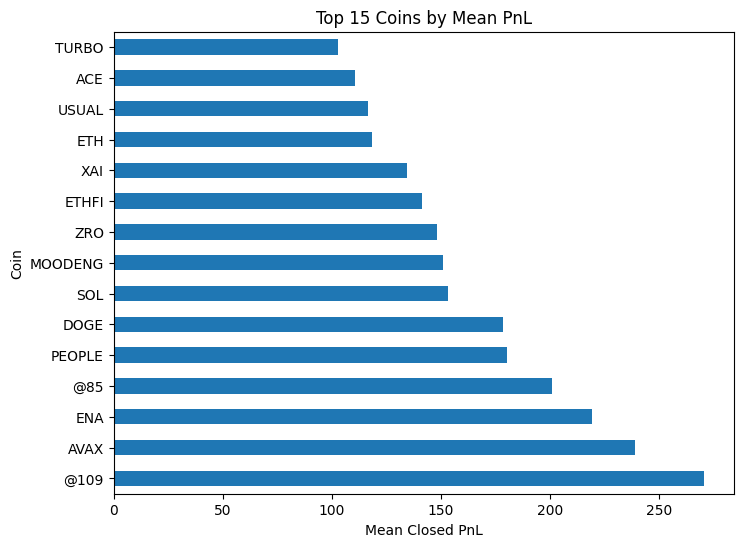

In [18]:
mean_pnl = merged.groupby('Coin')['Closed PnL'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 6))
mean_pnl.plot(kind='barh')
plt.title('Top 15 Coins by Mean PnL')
plt.xlabel('Mean Closed PnL')
plt.show()


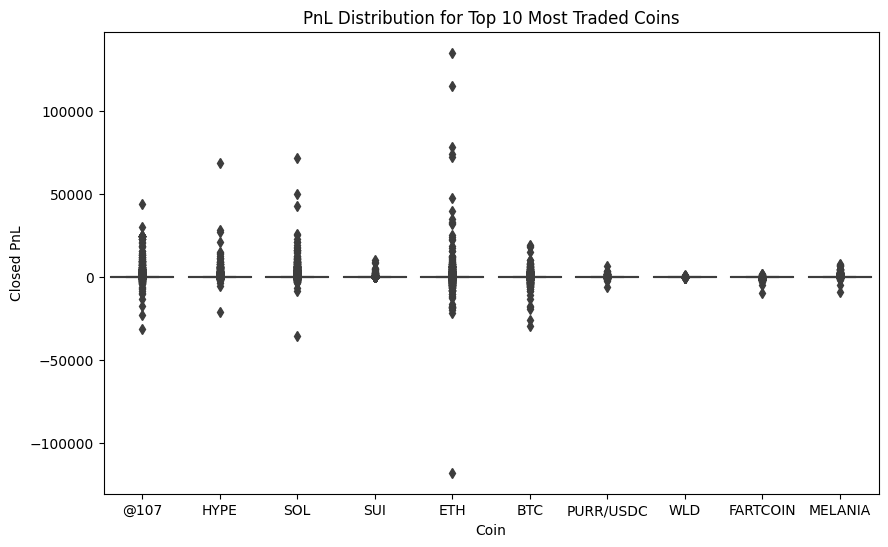

In [19]:
top_coins = merged['Coin'].value_counts().head(10).index
filtered = merged[merged['Coin'].isin(top_coins)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered, x='Coin', y='Closed PnL')
plt.title('PnL Distribution for Top 10 Most Traded Coins')
plt.show()

* **1. privous plot looks overcrowded due to too many unique coins on the x-axis.**> > 1. 

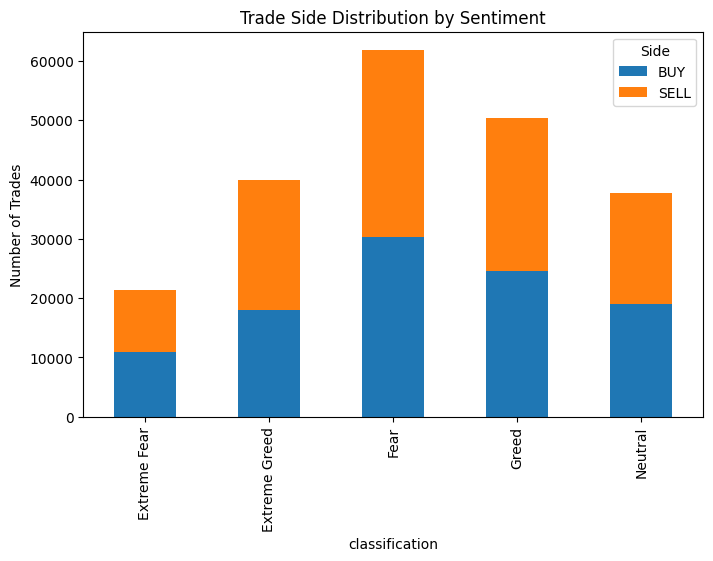

In [20]:
sentiment_direction = merged.groupby(['classification', 'Side']).size().unstack()
sentiment_direction.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Trade Side Distribution by Sentiment')
plt.ylabel('Number of Trades')
plt.show()

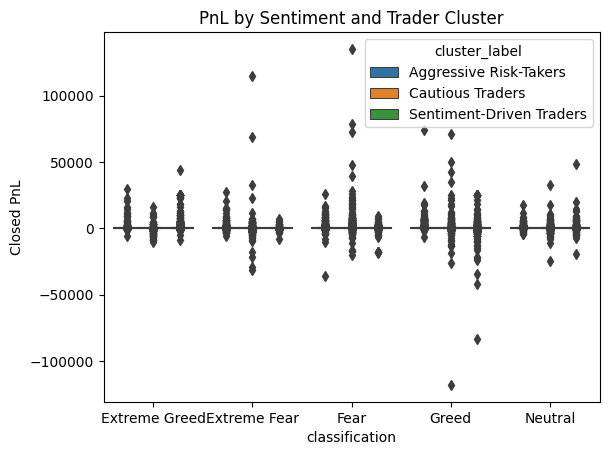

In [21]:
# Ensure cluster_label is in merged DataFrame
merged = merged.merge(trader_summary[['Account', 'cluster_label']], on='Account', how='left')

sns.boxplot(data=merged, x='classification', y='Closed PnL', hue='cluster_label')
plt.title('PnL by Sentiment and Trader Cluster')
plt.show()